In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#Importing Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
#Data Loading + Cleaning
df = pd.read_csv('lung cancer survey.csv')
df.isna().sum()
df = df.dropna()
df.count()

#Basic Data Exploration
df.head(5)
df.describe()
#Describe shows the following details:
#1. Gender, Smoking, Alcohol Consuming, Allergy are all roughly evenly split
#2. Chest pain / Fatigue / Shortness of Breath seems to have higher prevalence as symptoms compared to the others
#3. 80% of the dataset has lung cancer [Have to split the data by that and analyse the individual components T score test to see if it results in any differences]

GENDER                   99
AGE                      99
SMOKING                  99
YELLOW_FINGERS           99
ANXIETY                  99
PEER_PRESSURE            99
CHRONIC DISEASE          99
FATIGUE                  99
ALLERGY                  99
WHEEZING                 99
ALCOHOL CONSUMING        99
COUGHING                 99
SHORTNESS OF BREATH      99
SWALLOWING DIFFICULTY    99
CHEST PAIN               99
LUNG_CANCER              99
dtype: int64

GENDER                   9001
AGE                      9001
SMOKING                  9001
YELLOW_FINGERS           9001
ANXIETY                  9001
PEER_PRESSURE            9001
CHRONIC DISEASE          9001
FATIGUE                  9001
ALLERGY                  9001
WHEEZING                 9001
ALCOHOL CONSUMING        9001
COUGHING                 9001
SHORTNESS OF BREATH      9001
SWALLOWING DIFFICULTY    9001
CHEST PAIN               9001
LUNG_CANCER              9001
dtype: int64

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0.0,61.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,1.0,59.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,54.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
4,0.0,54.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,0.536274,60.706588,0.521053,0.527941,0.456283,0.510610,0.465726,0.687701,0.548272,0.490390,0.525164,0.593823,0.698034,0.347961,0.627819,0.805022
std,0.498710,11.342242,0.499584,0.499246,0.498113,0.499915,0.498852,0.463457,0.497692,0.499935,0.499394,0.491146,0.459136,0.476350,0.483413,0.396206
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,61.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,71.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,81.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Seeing Data Spread
np.bincount(df['AGE'], None, 10)
IndexAge = df[df['AGE'] < 39].index
df.drop(IndexAge, inplace = True)
df.count()
# Creating age category

df['AGE_CATEGORY'] = pd.cut(df["AGE"], bins = [39, 49, 59, 69, float('Inf')], labels = ['40-49', '50-59', '60-69', '70 onwards'])
df['AGE_CATEGORY'].value_counts()

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          2,    0, 2030,  110,  116,   97,  177,  186,  173,  136,  159,
        152,  168,  195,  184,  233,  270,  235,  263,  242,  226,  226,
        201,  260,  218,  260,  209,  167,  185,  155,  140,  148,  150,
       1174,  150,    1,    0,    2], dtype=int64)

GENDER                   9000
AGE                      9000
SMOKING                  9000
YELLOW_FINGERS           9000
ANXIETY                  9000
PEER_PRESSURE            9000
CHRONIC DISEASE          9000
FATIGUE                  9000
ALLERGY                  9000
WHEEZING                 9000
ALCOHOL CONSUMING        9000
COUGHING                 9000
SHORTNESS OF BREATH      9000
SWALLOWING DIFFICULTY    9000
CHEST PAIN               9000
LUNG_CANCER              9000
dtype: int64

AGE_CATEGORY
70 onwards    2481
60-69         2401
40-49         2355
50-59         1763
Name: count, dtype: int64

C:\Users\keith\AppData\Local\Temp\ipykernel_16664\1461560224.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = df.groupby(['AGE_CATEGORY', 'LUNG_CANCER', 'SMOKING']).size().reset_index(name = 'Count')
C:\Users\keith\AppData\Local\Temp\ipykernel_16664\1461560224.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot2 = plot.groupby(['AGE_CATEGORY', 'SMOKING'])['Count'].transform('sum')


,AGE_CATEGORY,LUNG_CANCER,SMOKING,Count,Proportion
0,40-49,0.0,0.0,314,0.269759
1,40-49,0.0,1.0,213,0.178841
2,40-49,1.0,0.0,850,0.730241
3,40-49,1.0,1.0,978,0.821159
4,50-59,0.0,0.0,175,0.219573
5,50-59,0.0,1.0,157,0.162526
6,50-59,1.0,0.0,622,0.780427
7,50-59,1.0,1.0,809,0.837474
8,60-69,0.0,0.0,262,0.221658
9,60-69,0.0,1.0,236,0.193601


C:\Users\keith\AppData\Local\Temp\ipykernel_16664\1461560224.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig_plot = sns.catplot(data = plot, kind = 'bar', x = 'AGE_CATEGORY', y = 'Proportion', col = 'SMOKING', hue = 'LUNG_CANCER', ci = None)


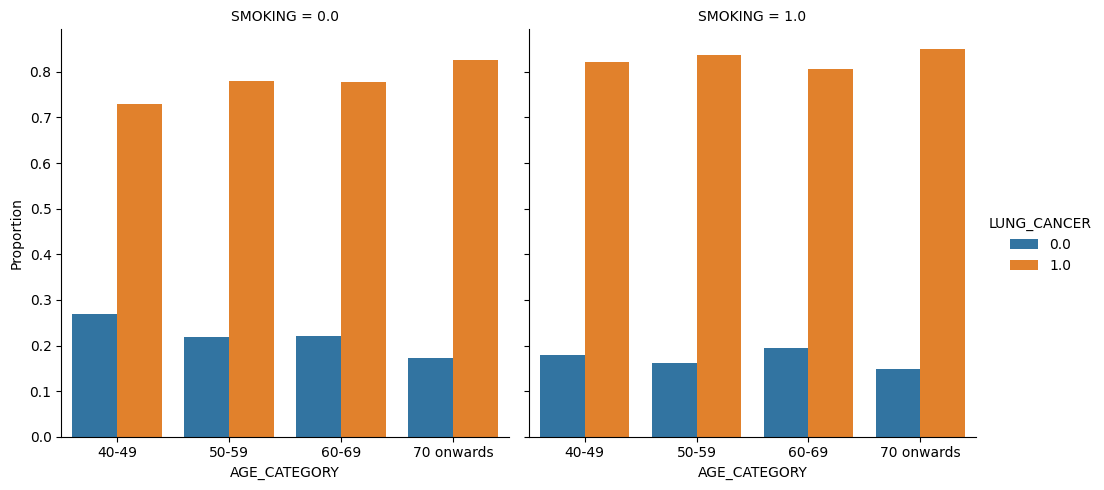

In [35]:
plot = df.groupby(['AGE_CATEGORY', 'LUNG_CANCER', 'SMOKING']).size().reset_index(name = 'Count')
plot2 = plot.groupby(['AGE_CATEGORY', 'SMOKING'])['Count'].transform('sum')
plot['Proportion'] = plot['Count']/plot2

plot
fig_plot = sns.catplot(data = plot, kind = 'bar', x = 'AGE_CATEGORY', y = 'Proportion', col = 'SMOKING', hue = 'LUNG_CANCER', ci = None)

In [38]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

smokers_with_cancer = 175
smokers_without_cancer = 157
non_smokers_with_cancer = 622
non_smokers_without_cancer = 175

counts = np.array([smokers_with_cancer, non_smokers_with_cancer])
nobs = np.array([smokers_with_cancer + smokers_without_cancer,
                 non_smokers_with_cancer + non_smokers_without_cancer])

counts
nobs


# Perform Two-Proportion Z-Test
stat, p_value = proportions_ztest(counts, nobs)

print(f"Z Stat: {stat}, p-value: {p_value}")

array([175, 622])

array([332, 797])

Z Stat: -8.511641161361448, p-value: 1.7148859000645658e-17


C:\Users\keith\AppData\Local\Temp\ipykernel_11472\1897709311.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = df.groupby(['LUNG_CANCER', i, 'AGE_CATEGORY']).size().reset_index(name = 'Count')
C:\Users\keith\AppData\Local\Temp\ipykernel_11472\1897709311.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig_plot = sns.catplot(data = plot, kind = 'bar', x = 'AGE_CATEGORY', y = 'Count', col = i, hue = 'LUNG_CANCER', ci = None)


Text(0.5, 1.02, 'SMOKING')

[Text(0, 0, '314'), Text(0, 0, '175'), Text(0, 0, '262'), Text(0, 0, '202')]

[Text(0, 0, '850'), Text(0, 0, '622'), Text(0, 0, '920'), Text(0, 0, '966')]

[Text(0, 0, '213'), Text(0, 0, '157'), Text(0, 0, '236'), Text(0, 0, '196')]

[Text(0, 0, '978'), Text(0, 0, '809'), Text(0, 0, '983'), Text(0, 0, '1117')]

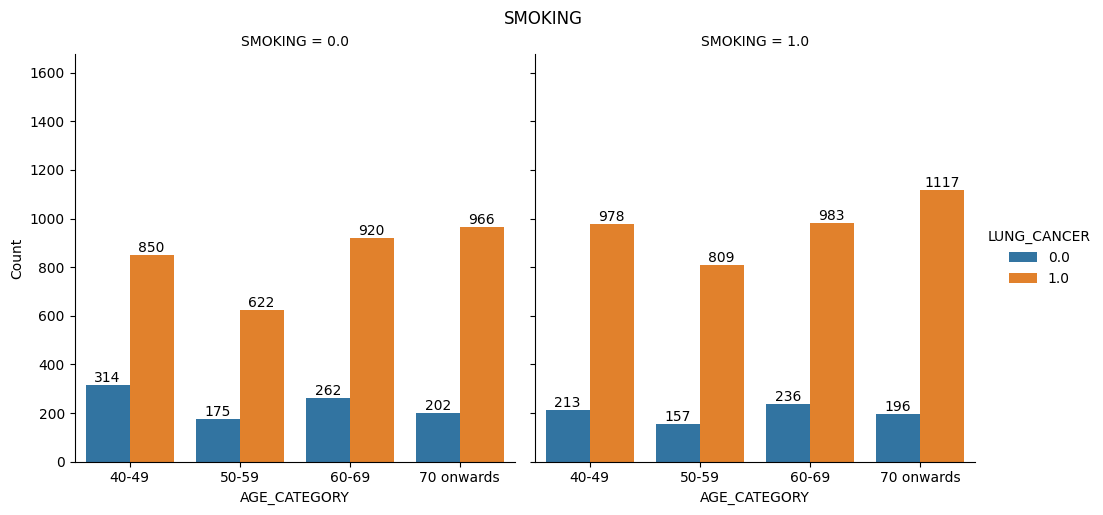

C:\Users\keith\AppData\Local\Temp\ipykernel_11472\1897709311.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = df.groupby(['LUNG_CANCER', i, 'AGE_CATEGORY']).size().reset_index(name = 'Count')
C:\Users\keith\AppData\Local\Temp\ipykernel_11472\1897709311.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig_plot = sns.catplot(data = plot, kind = 'bar', x = 'AGE_CATEGORY', y = 'Count', col = i, hue = 'LUNG_CANCER', ci = None)


Text(0.5, 1.02, 'ANXIETY')

[Text(0, 0, '317'), Text(0, 0, '204'), Text(0, 0, '269'), Text(0, 0, '227')]

[Text(0, 0, '993'), Text(0, 0, '819'), Text(0, 0, '969'), Text(0, 0, '1095')]

[Text(0, 0, '210'), Text(0, 0, '128'), Text(0, 0, '229'), Text(0, 0, '171')]

[Text(0, 0, '835'), Text(0, 0, '612'), Text(0, 0, '934'), Text(0, 0, '988')]

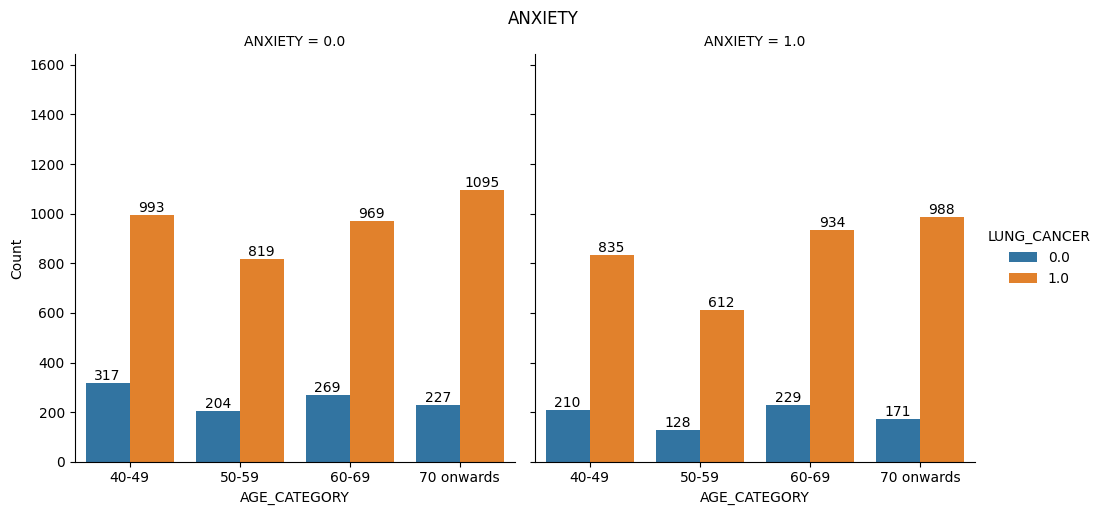

C:\Users\keith\AppData\Local\Temp\ipykernel_11472\1897709311.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = df.groupby(['LUNG_CANCER', i, 'AGE_CATEGORY']).size().reset_index(name = 'Count')
C:\Users\keith\AppData\Local\Temp\ipykernel_11472\1897709311.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig_plot = sns.catplot(data = plot, kind = 'bar', x = 'AGE_CATEGORY', y = 'Count', col = i, hue = 'LUNG_CANCER', ci = None)


Text(0.5, 1.02, 'CHRONIC DISEASE')

[Text(0, 0, '254'), Text(0, 0, '165'), Text(0, 0, '273'), Text(0, 0, '208')]

[Text(0, 0, '1020'), Text(0, 0, '721'), Text(0, 0, '1059'), Text(0, 0, '1109')]

[Text(0, 0, '273'), Text(0, 0, '167'), Text(0, 0, '225'), Text(0, 0, '190')]

[Text(0, 0, '808'), Text(0, 0, '710'), Text(0, 0, '844'), Text(0, 0, '974')]

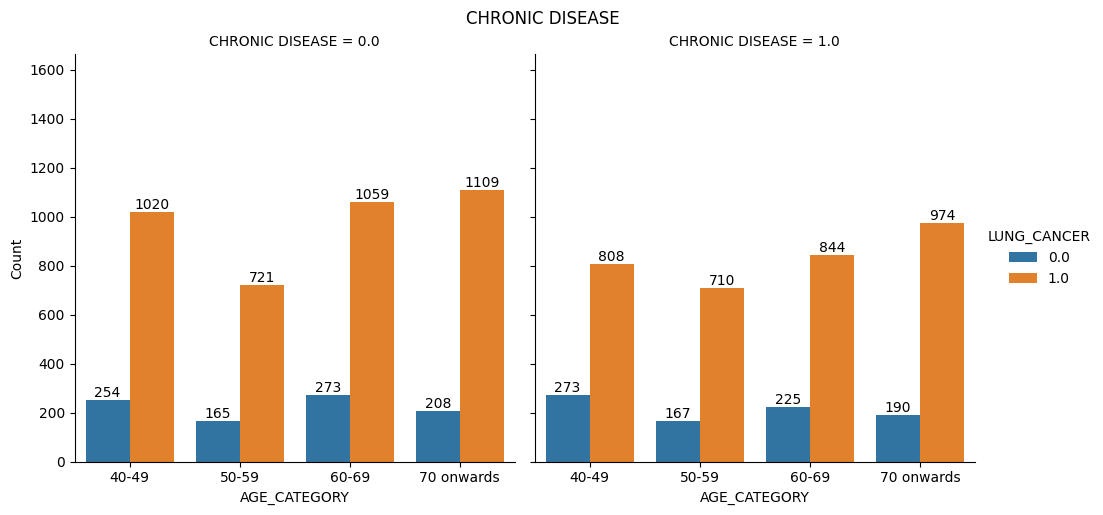

C:\Users\keith\AppData\Local\Temp\ipykernel_11472\1897709311.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot = df.groupby(['LUNG_CANCER', i, 'AGE_CATEGORY']).size().reset_index(name = 'Count')
C:\Users\keith\AppData\Local\Temp\ipykernel_11472\1897709311.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fig_plot = sns.catplot(data = plot, kind = 'bar', x = 'AGE_CATEGORY', y = 'Count', col = i, hue = 'LUNG_CANCER', ci = None)


Text(0.5, 1.02, 'ALCOHOL CONSUMING')

[Text(0, 0, '382'), Text(0, 0, '211'), Text(0, 0, '349'), Text(0, 0, '261')]

[Text(0, 0, '787'), Text(0, 0, '533'), Text(0, 0, '822'), Text(0, 0, '928')]

[Text(0, 0, '145'), Text(0, 0, '121'), Text(0, 0, '149'), Text(0, 0, '137')]

[Text(0, 0, '1041'), Text(0, 0, '898'), Text(0, 0, '1081'), Text(0, 0, '1155')]

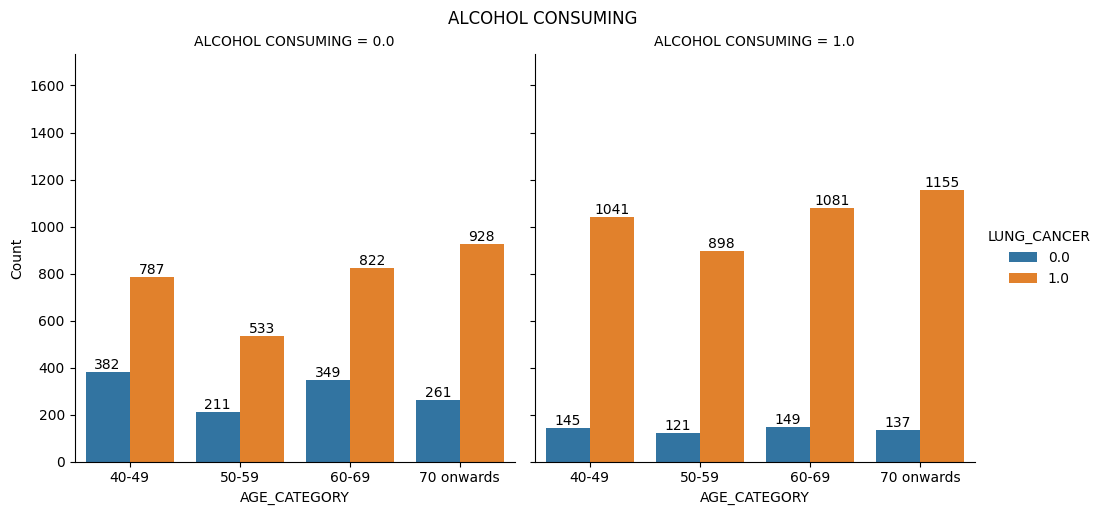

In [5]:
risk_factor = ['SMOKING', 'ANXIETY', 'CHRONIC DISEASE', 'ALCOHOL CONSUMING']
symptoms = ['YELLOW_FINGERS', 'FATIGUE', 'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOIWNG DIFFICULTY', 'CHEST PAIN']
for i in risk_factor:
    plot = df.groupby(['LUNG_CANCER', i, 'AGE_CATEGORY']).size().reset_index(name = 'Count')
    fig_plot = sns.catplot(data = plot, kind = 'bar', x = 'AGE_CATEGORY', y = 'Count', col = i, hue = 'LUNG_CANCER', ci = None)
    fig_plot.set_titles("{col_var} = {col_name}")
    fig_plot.figure.suptitle(i, y = 1.02)
    for ax in fig_plot.axes.ravel():
        for c in ax.containers:
            ax.bar_label(c, label_type = 'edge')
        ax.margins(y = 0.5)
    plt.show()

In [6]:
import scipy.stats as stats
import researchpy as rp

In [7]:
Result = {}
for i in df['AGE_CATEGORY'].unique():
    for y in df['GENDER'].unique():
        sub_data = df[(df['AGE_CATEGORY'] == i) & (df['GENDER'] == y)]    
        for e in risk_factor:
            crosstab, test_results, expected = rp.crosstab(sub_data['LUNG_CANCER'], sub_data[e], test = 'chi-square', expected_freqs=True, prop = 'cell')
            Result[f'Gender: {y}, Age Group: {i}, Risk: {e}'] = [f'Significance: {test_results.iloc[1, 1]}, Cramer: {test_results.iloc[2, 1]}']

c:\Users\keith\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
c:\Users\keith\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
c:\Users\keith\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pand

In [8]:
Result

{'Gender: 0.0, Age Group: 60-69, Risk: SMOKING': ['Significance: 0.9751, Cramer: 0.0009'],
 'Gender: 0.0, Age Group: 60-69, Risk: ANXIETY': ['Significance: 0.66, Cramer: 0.0132'],
 'Gender: 0.0, Age Group: 60-69, Risk: CHRONIC DISEASE': ['Significance: 0.7786, Cramer: 0.0084'],
 'Gender: 0.0, Age Group: 60-69, Risk: ALCOHOL CONSUMING': ['Significance: 0.0002, Cramer: 0.1116'],
 'Gender: 1.0, Age Group: 60-69, Risk: SMOKING': ['Significance: 0.0354, Cramer: 0.0587'],
 'Gender: 1.0, Age Group: 60-69, Risk: ANXIETY': ['Significance: 0.1994, Cramer: 0.0358'],
 'Gender: 1.0, Age Group: 60-69, Risk: CHRONIC DISEASE': ['Significance: 0.817, Cramer: 0.0065'],
 'Gender: 1.0, Age Group: 60-69, Risk: ALCOHOL CONSUMING': ['Significance: 0.0, Cramer: 0.3042'],
 'Gender: 0.0, Age Group: 70 onwards, Risk: SMOKING': ['Significance: 0.1875, Cramer: 0.0387'],
 'Gender: 0.0, Age Group: 70 onwards, Risk: ANXIETY': ['Significance: 0.1761, Cramer: 0.0397'],
 'Gender: 0.0, Age Group: 70 onwards, Risk: CHRONI

In [ ]:
Result2 = {}
for i in symptoms:
    for e in df[i].unique():
        sub_data = df[(df[i] == e)]
        for s in symptoms:
            crosstab, test_results, expected = rp.crosstab(sub_data['LUNG_CANCER'], sub_data[s], test = 'chi-square', expected_freqs=True, prop = 'cell')
            Result[f'Gender: {y}, Age Group: {i}, Risk: {e}'] = [f'Significance: {test_results.iloc[1, 1]}, Cramer: {test_results.iloc[2, 1]}']